<a href="https://colab.research.google.com/github/lewinskie254/eda/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statistics as stat
import scipy.stats as stats

In [2]:
#one way anova is categorical to numeric relationships
df = pd.read_csv("http://ishelp.info/data/insurance.csv")

In [3]:
from statsmodels.regression.linear_model import OLS

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
X = df [['age', 'bmi', 'children']]
y= df.charges

In [12]:
X_encoded = pd.get_dummies(X, drop_first=True)
model = OLS(y, X_encoded)
results = model.fit()

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.595
Method:                 Least Squares   F-statistic:                              655.7
Date:                Sat, 22 Nov 2025   Prob (F-statistic):                   6.63e-262
Time:                        18:54:20   Log-Likelihood:                         -14400.
No. Observations:                1338   AIC:                                  2.881e+04
Df Residuals:                    1335   BIC:                                  2.882e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          206.1007     20.524     10.042      0.000     165.838     246.363
bmi          164.1675     28.308      5.799      0.000     108.635     219.700
children     411.0972    257.211      1.598      0.110     -93.484     915.678
==============================================================================
Omnibus:                      369.249   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              748.397
Skew:                           1.647   Prob(JB):                    3.07e-163
Kurtosis:                       4.605   Cond. No.                         42.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$y_i = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip} + \epsilon_i$$y_i = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip} + \epsilon_i$

where $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$$\epsilon_i \sim \mathcal{N}(0, \sigma^2)$. This implies that $y_i \sim \mathcal{N}(\beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}, \sigma^2)$$y_i \sim \mathcal{N}(\beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}, \sigma^2)$.

The probability density function (PDF) for a single observation $y_i$$y_i$ given its predictors $\mathbf{x}_i$$\mathbf{x}_i$ and the parameters (coefficients $\boldsymbol{\beta}$$\boldsymbol{\beta}$ and variance $\sigma^2$$\sigma^2$) is:

$f(y_i | \mathbf{x}_i, \boldsymbol{\beta}, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - \mathbf{x}_i^{\top}\boldsymbol{\beta})^2}{2\sigma^2}\right)$$f(y_i | \mathbf{x}_i, \boldsymbol{\beta}, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - \mathbf{x}_i^{\top}\boldsymbol{\beta})^2}{2\sigma^2}\right)$

For a dataset of $n$$n$ independent observations, the likelihood function $\mathcal{L}(\boldsymbol{\beta}, \sigma^2 | \mathbf{y}, \mathbf{X})$$\mathcal{L}(\boldsymbol{\beta}, \sigma^2 | \mathbf{y}, \mathbf{X})$ is the product of the individual PDFs:

$\mathcal{L}(\boldsymbol{\beta}, \sigma^2 | \mathbf{y}, \mathbf{X}) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - \mathbf{x}_i^{\top}\boldsymbol{\beta})^2}{2\sigma^2}\right)$$\mathcal{L}(\boldsymbol{\beta}, \sigma^2 | \mathbf{y}, \mathbf{X}) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - \mathbf{x}_i^{\top}\boldsymbol{\beta})^2}{2\sigma^2}\right)$

To simplify calculations (especially for optimization), we usually work with the log-likelihood function, which is the natural logarithm of the likelihood function:

$\text{LL}(\boldsymbol{\beta}, \sigma^2 | \mathbf{y}, \mathbf{X}) = \ln\left(\mathcal{L}(\boldsymbol{\beta}, \sigma^2 | \mathbf{y}, \mathbf{X})\right)$$\text{LL}(\boldsymbol{\beta}, \sigma^2 | \mathbf{y}, \mathbf{X}) = \ln\left(\mathcal{L}(\boldsymbol{\beta}, \sigma^2 | \mathbf{y}, \mathbf{X})\right)$

$\text{LL}(\boldsymbol{\beta}, \sigma^2 | \mathbf{y}, \mathbf{X}) = \sum_{i=1}^{n} \ln\left(\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - \mathbf{x}_i^{\top}\boldsymbol{\beta})^2}{2\sigma^2}\right)\right)$$\text{LL}(\boldsymbol{\beta}, \sigma^2 | \mathbf{y}, \mathbf{X}) = \sum_{i=1}^{n} \ln\left(\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - \mathbf{x}_i^{\top}\boldsymbol{\beta})^2}{2\sigma^2}\right)\right)$

Using the properties of logarithms ($\ln(ab) = \ln(a) + \ln(b)$$\ln(ab) = \ln(a) + \ln(b)$ and $\ln(e^x) = x$$\ln(e^x) = x$):

$\text{LL}(\boldsymbol{\beta}, \sigma^2 | \mathbf{y}, \mathbf{X}) = \sum_{i=1}^{n} \left( -\frac{1}{2}\ln(2\pi) - \frac{1}{2}\ln(\sigma^2) - \frac{(y_i - \mathbf{x}_i^{\top}\boldsymbol{\beta})^2}{2\sigma^2} \right)$$\text{LL}(\boldsymbol{\beta}, \sigma^2 | \mathbf{y}, \mathbf{X}) = \sum_{i=1}^{n} \left( -\frac{1}{2}\ln(2\pi) - \frac{1}{2}\ln(\sigma^2) - \frac{(y_i - \mathbf{x}_i^{\top}\boldsymbol{\beta})^2}{2\sigma^2} \right)$

Combining the sums:

$\text{LL}(\boldsymbol{\beta}, \sigma^2 | \mathbf{y}, \mathbf{X}) = -\frac{n}{2}\ln(2\pi) - \frac{n}{2}\ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - \mathbf{x}_i^{\top}\boldsymbol{\beta})^2$$\text{LL}(\boldsymbol{\beta}, \sigma^2 | \mathbf{y}, \mathbf{X}) = -\frac{n}{2}\ln(2\pi) - \frac{n}{2}\ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - \mathbf{x}_i^{\top}\boldsymbol{\beta})^2$

Where:

$n$$n$ is the number of observations.
$y_i$$y_i$ is the actual observed value for the dependent variable for observation $i$$i$.
$\mathbf{x}_i^{\top}\boldsymbol{\beta}$$\mathbf{x}_i^{\top}\boldsymbol{\beta}$ is the predicted value for $y_i$$y_i$ by the linear model (i.e., $\hat{y}_i$$\hat{y}_i$).
$\mathbf{x}_i^{\top}\boldsymbol{\beta} = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}$$\mathbf{x}_i^{\top}\boldsymbol{\beta} = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}$
$\sigma^2$$\sigma^2$ is the variance of the error terms.
The term $(y_i - \mathbf{x}_i^{\top}\boldsymbol{\beta})^2$$(y_i - \mathbf{x}_i^{\top}\boldsymbol{\beta})^2$ is the squared residual for observation $i$$i$.
In Maximum Likelihood Estimation, we choose the values for $\boldsymbol{\beta}$$\boldsymbol{\beta}$ and $\sigma^2$$\sigma^2$ that maximize this log-likelihood function. Interestingly, for linear regression with normally distributed errors, maximizing this log-likelihood function with respect to $\boldsymbol{\beta}$$\boldsymbol{\beta}$ is equivalent to minimizing the sum of squared residuals, which is precisely what Ordinary Least Squares (OLS) does.



In [14]:
df['predictions'] = results.fittedvalues

In [15]:
df

,age,sex,bmi,children,smoker,region,charges,predictions
0,19,female,27.900,0,yes,southwest,16884.92400,8348.435287
1,18,male,33.770,1,no,southeast,1725.55230,9538.436899
2,28,male,33.000,3,no,southeast,4449.46200,12421.637777
3,33,male,22.705,0,no,northwest,21984.47061,10413.006848
4,32,male,28.880,0,no,northwest,3866.85520,11191.911283
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,16463.349586
1334,18,female,31.920,0,no,northeast,2205.98080,8799.004693
1335,18,female,36.850,0,no,southeast,1629.83350,9619.842265
1336,21,female,25.800,0,no,southwest,2007.94500,8432.301563


In [25]:
sample_predictions = df.sample(10)

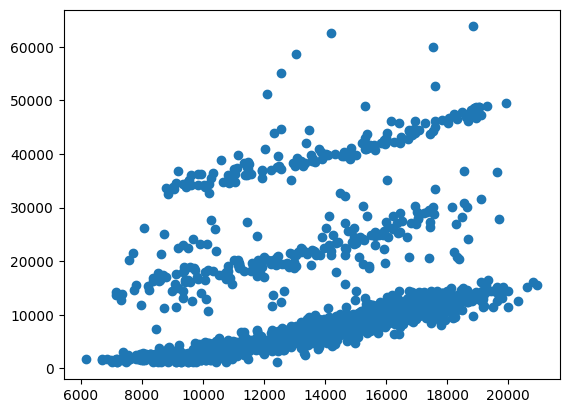

In [30]:
plt.scatter(df.predictions, df.charges)
plt.show()

<Axes: xlabel='charges', ylabel='predictions'>

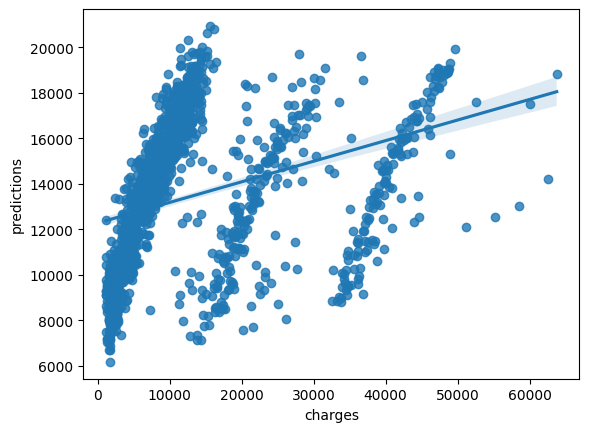

In [28]:
sns.regplot(x='charges', y='predictions', data=df)

In [34]:
# To drop a column, specify the column name and axis=1, or use the 'columns' argument.
df = df.drop(columns=['predictions'])
# Display the DataFrame to confirm the column has been dropped
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
classification_map = {(j, j+1000): i for i, j in enumerate(range(0, round(df.charges.max()+ 1000), 1000))}

In [62]:
classification_map

{(0, 1000): 0,
 (1000, 2000): 1,
 (2000, 3000): 2,
 (3000, 4000): 3,
 (4000, 5000): 4,
 (5000, 6000): 5,
 (6000, 7000): 6,
 (7000, 8000): 7,
 (8000, 9000): 8,
 (9000, 10000): 9,
 (10000, 11000): 10,
 (11000, 12000): 11,
 (12000, 13000): 12,
 (13000, 14000): 13,
 (14000, 15000): 14,
 (15000, 16000): 15,
 (16000, 17000): 16,
 (17000, 18000): 17,
 (18000, 19000): 18,
 (19000, 20000): 19,
 (20000, 21000): 20,
 (21000, 22000): 21,
 (22000, 23000): 22,
 (23000, 24000): 23,
 (24000, 25000): 24,
 (25000, 26000): 25,
 (26000, 27000): 26,
 (27000, 28000): 27,
 (28000, 29000): 28,
 (29000, 30000): 29,
 (30000, 31000): 30,
 (31000, 32000): 31,
 (32000, 33000): 32,
 (33000, 34000): 33,
 (34000, 35000): 34,
 (35000, 36000): 35,
 (36000, 37000): 36,
 (37000, 38000): 37,
 (38000, 39000): 38,
 (39000, 40000): 39,
 (40000, 41000): 40,
 (41000, 42000): 41,
 (42000, 43000): 42,
 (43000, 44000): 43,
 (44000, 45000): 44,
 (45000, 46000): 45,
 (46000, 47000): 46,
 (47000, 48000): 47,
 (48000, 49000): 48,
 (4

In [89]:
charges_classification = [i for i in range(0, round(df.charges.max()) + 1000, 1000)]

In [54]:
df['classification'] = pd.cut(df.charges, bins=charges_classification)

In [55]:
df.head()

,age,sex,bmi,children,smoker,region,charges,classification
0,19,female,27.900,0,yes,southwest,16884.92400,"(16000, 17000]"
1,18,male,33.770,1,no,southeast,1725.55230,"(1000, 2000]"
2,28,male,33.000,3,no,southeast,4449.46200,"(4000, 5000]"
3,33,male,22.705,0,no,northwest,21984.47061,"(21000, 22000]"
4,32,male,28.880,0,no,northwest,3866.85520,"(3000, 4000]"


In [65]:
df['classy'] = df['classification'].apply(lambda x: classification_map[(x.left, x.right)])

In [66]:
df.classy

,classy
0,16
1,1
2,4
3,21
4,3
...,...
1333,10
1334,2
1335,1
1336,2


In [67]:
y = df.classy

In [68]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'classification', 'class', 'classy'],
      dtype='object')

In [74]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
X= pd.get_dummies(X, drop_first=True)

In [90]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [96]:
model = SVC()

In [125]:
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable 'y'
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [126]:
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:00:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "random_seed" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [127]:
y_preds = model.predict(X_test)

In [128]:
accuracy_score(y_test, y_preds)

0.5335820895522388

In [129]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [181]:
search_space = {
    'n_estimators': [i for i in range(200, 300, 10)],
    'max_depth': [i for i in range(0, 20, 2)],
    'gamma': list(np.logspace(0, 3, 10)),
    'learning_rate': list(np.linspace(0.001, 1, 10))
}

In [182]:
grid_search = GridSearchCV(XGBClassifier(), search_space, scoring=['accuracy', 'precision_weighted', 'recall_weighted'], cv=3, verbose=1, n_jobs=-1, refit='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10000 candidates, totalling 30000 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


In [143]:
grid_search.best_params_

{'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 250}

In [144]:
print(grid_search.best_score_)

0.8289716635717957


In [145]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, ...)

In [146]:
XGboost_scores= pd.DataFrame(grid_search.cv_results_)

In [148]:
XGboost_scores.to_csv('XGboost_scores.csv')

In [173]:
params = XGboost_scores[['param_gamma', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'rank_test_accuracy', 'mean_test_accuracy']]

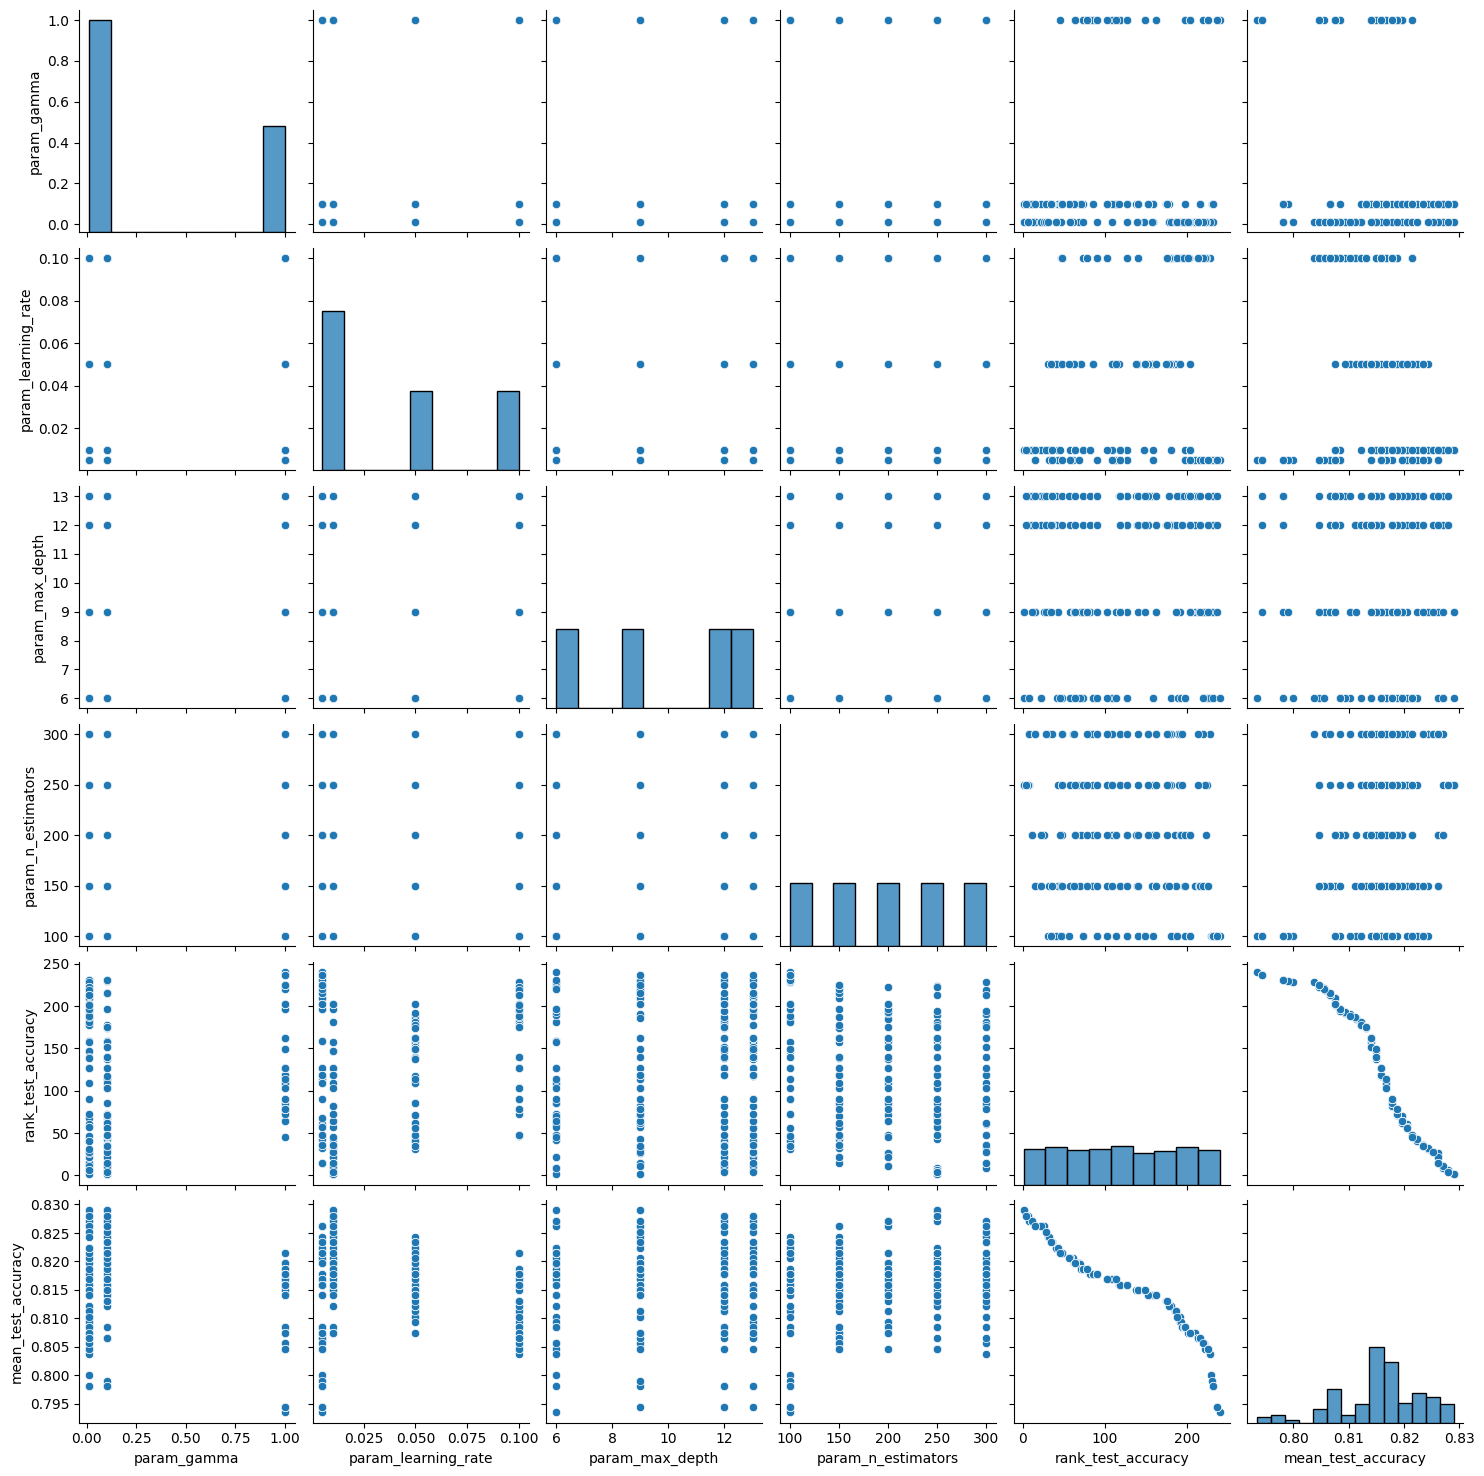

In [174]:
sns.pairplot(params)